print a table and a plot chart for top 5 download apps in each category free and paid (if there is paid)

In [1]:
import numpy as np
import pandas as pd

playstore = pd.read_csv('https://raw.githubusercontent.com/b21527486/data_science/main/cleaned_playstore.csv')
playstoreReviews = pd.read_csv('https://raw.githubusercontent.com/b21527486/data_science/main/cleaned_playstore_reviews.csv')

ps = playstore
psr = playstoreReviews

In [2]:
FreeTop5s = ps[ps['Type'] == 'Free'].groupby('Category', group_keys=False).apply( lambda grp: grp.nlargest(5, 'Installs') )
PaidTop5s = ps[ps['Type'] == 'Paid'].groupby('Category', group_keys=False).apply( lambda grp: grp.nlargest(5, 'Installs') )

Top5apps = pd.concat([FreeTop5s, PaidTop5s])
Top5apps["Category"] = Top5apps["Category"].str.replace("_", " ").str.title()

c:\Users\Enis Mert Kiriş\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


AttributeError: PathCollection.set() got an unexpected keyword argument 'ascending'

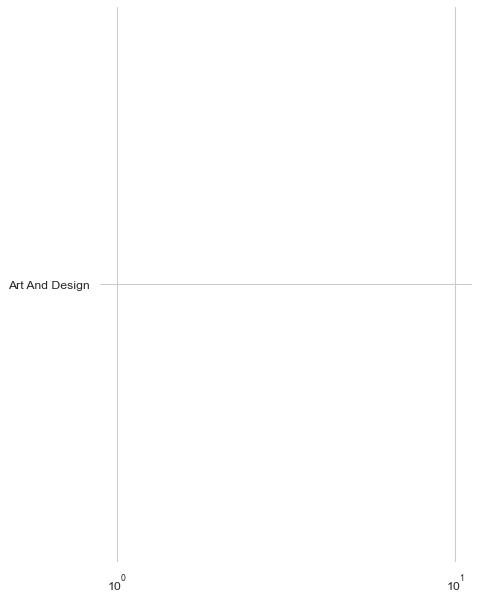

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

# Initialize the figure
f, ax = plt.subplots(figsize=(6, 9), dpi=80)
sns.despine(bottom=True, left=True)
plt.xscale('log')

# Show each observation with a scatterplot
sns.stripplot(
    data=Top5apps, x="Installs", y="Category", hue="Type",
    dodge=True, alpha=.25, zorder=1 
)
